<a href="https://colab.research.google.com/github/reja360/Wind-Rose/blob/main/Wind-Rose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
url = "https://raw.githubusercontent.com/reja360/Wind-Rose/main/TIME.csv"

In [44]:
df= pd.read_csv('https://raw.githubusercontent.com/reja360/Wind-Rose/main/TIME.csv',encoding= 'unicode_escape')
df = pd.read_csv(url, parse_dates=["Timestamp"])
df = df.set_index("Timestamp")

In [45]:
df.head()

,speed,direction
Timestamp,,
2018-01-01 00:00:00,5.311336,259.994904
2018-01-01 00:10:00,5.672167,268.641113
2018-01-01 00:20:00,5.216037,272.564789
2018-01-01 00:30:00,5.659674,271.258087
2018-01-01 00:40:00,5.577941,265.674286


In [46]:
# Import the required packages
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from math import pi
# Uncomment the following line in case you are missing those packages

In [47]:
!pip install windrose openpyxl
from windrose import WindroseAxes

In [48]:
import numpy as np
df["speed_x"] = df["speed"] * np.sin(df["direction"] * np.pi / 180.0)
df["speed_y"] = df["speed"] * np.cos(df["direction"] * np.pi / 180.0)

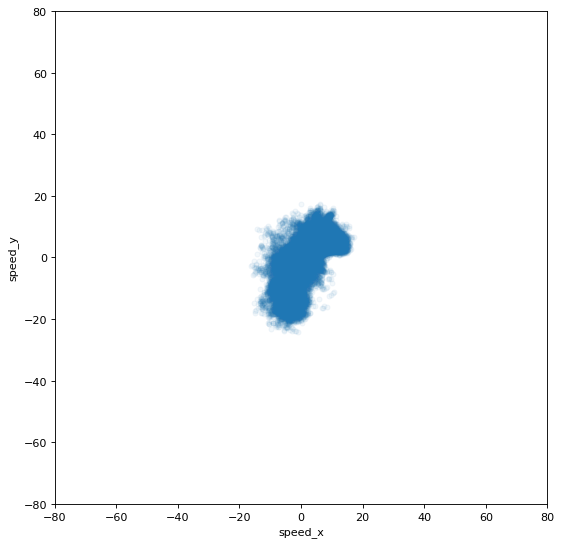

In [49]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect("equal")
df.plot(kind="scatter", x="speed_x", y="speed_y", alpha=0.05, ax=ax)
Vw = 80
ax.set_xlim([-Vw, Vw])
ax.set_ylim([-Vw, Vw]);

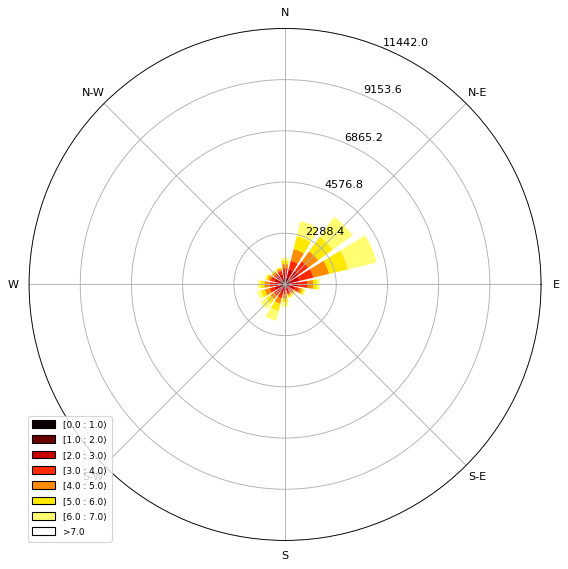

In [50]:
import matplotlib.cm as cm

from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(
    df.direction.values, df.speed.values, bins=np.arange(0.01, 8, 1), cmap=cm.hot, lw=3
)
ax.set_legend();

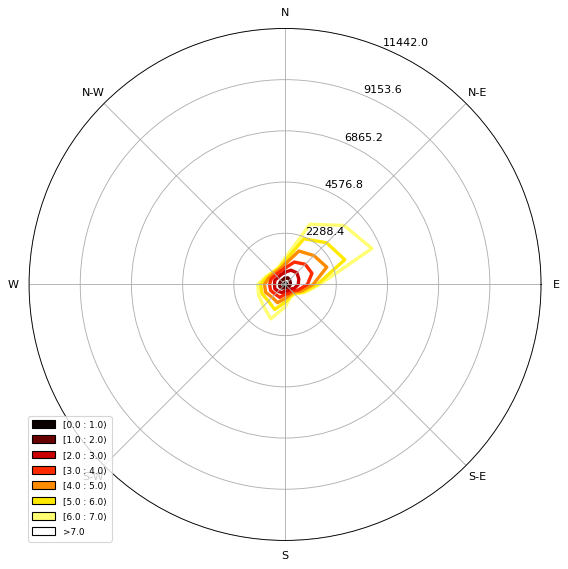

In [51]:
from windrose import plot_windrose

plot_windrose(df, kind="contour", bins=np.arange(0.01, 8, 1), cmap=cm.hot, lw=3);

In [52]:
bins = np.arange(0, 30 + 1, 1)
bins = bins[1:]
bins

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

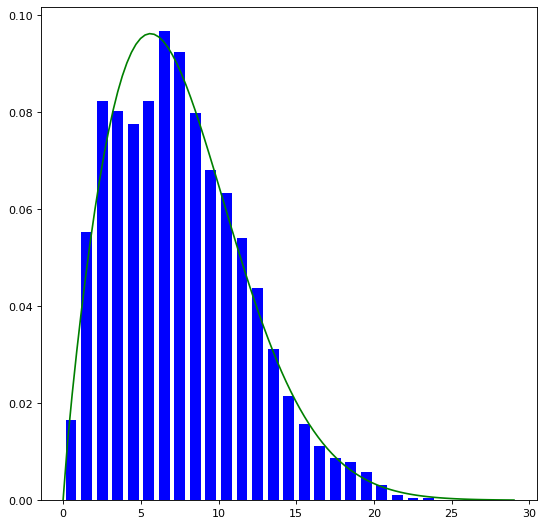

In [53]:
plot_windrose(df, kind="pdf", bins=np.arange(0.01, 30, 1));

In [54]:
data = np.histogram(df["speed"], bins=bins)[0]
data

array([2779, 4146, 4077, 3918, 4141, 4881, 4680, 4037, 3444, 3199, 2725,
       2225, 1587, 1088,  798,  566,  438,  400,  302,  164,   56,   27,
         20,    7,    1,    0,    0,    0,    0])

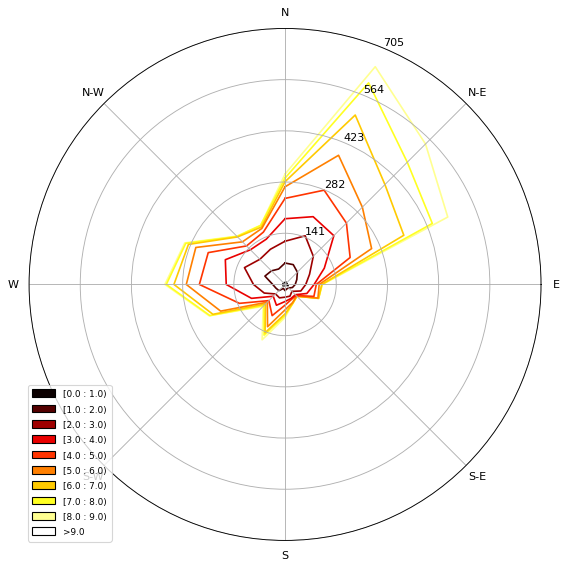

In [58]:
def plot_month(df, t_year_month, *args, **kwargs):
    by = "year_month"
    df[by] = df.index.map(lambda dt: (dt.year, dt.month))
    df_month = df[df[by] == t_year_month]
    ax = plot_windrose(df_month, *args, **kwargs)
    return ax


plot_month(df, (2018, 7), kind="contour", bins=np.arange(0, 10, 1), cmap=cm.hot);

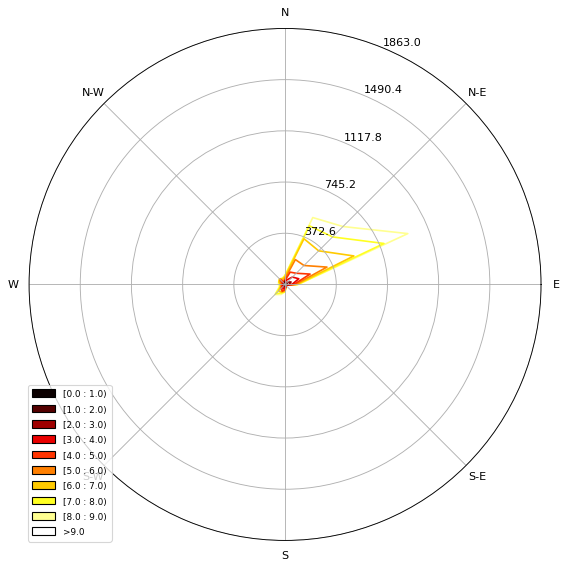

In [59]:
plot_month(df, (2018, 8), kind="contour", bins=np.arange(0, 10, 1), cmap=cm.hot);

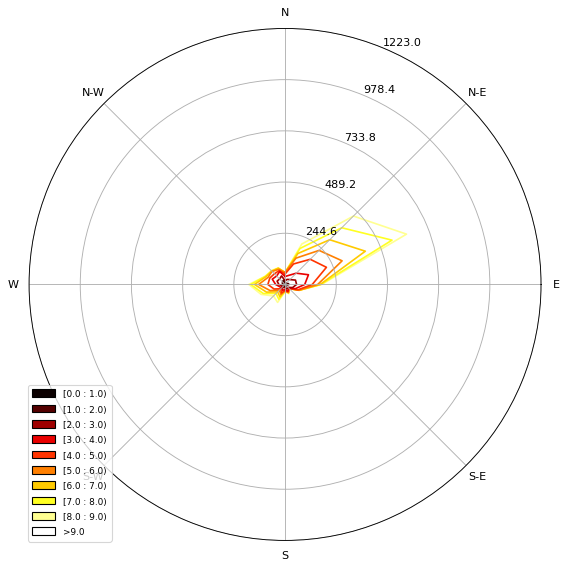

In [60]:
plot_month(df, (2018, 9), kind="contour", bins=np.arange(0, 10, 1), cmap=cm.hot);